# Lab 7: Topic Models

In this lab, we'll apply Latent Dirichlet Allocation to the text data that we explored last week. We'll focus on [The Liberator](https://en.wikipedia.org/wiki/The_Liberator_(newspaper)), a prominent anti-slavery newspaper. As a warning, the corpus contains offensively racist language, often quoted from pro-slavery advocates. 

To do the lab, Georgia Tech students can download the resource `liberator-stories.tgz` from T-square. Put it in the same directory as this lab.

In [28]:
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.feature_extraction.text import CountVectorizer
from glob import glob
from dateutil.parser import parse
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
! tar xvzf liberator-stories.tgz

x liberator-stories/
x liberator-stories/Issue of March 11, 1853/
x liberator-stories/Issue of March 11, 1853/story000.txt
x liberator-stories/Issue of March 11, 1853/story008.txt
x liberator-stories/Issue of March 11, 1853/story003.txt
x liberator-stories/Issue of March 11, 1853/story004.txt
x liberator-stories/Issue of March 11, 1853/story006.txt
x liberator-stories/Issue of March 11, 1853/story001.txt
x liberator-stories/Issue of March 11, 1853/story007.txt
x liberator-stories/Issue of March 11, 1853/story002.txt
x liberator-stories/Issue of March 11, 1853/story009.txt
x liberator-stories/Issue of March 11, 1853/story005.txt
x liberator-stories/Issue of June 01, 1855/
x liberator-stories/Issue of June 01, 1855/story000.txt
x liberator-stories/Issue of June 01, 1855/story008.txt
x liberator-stories/Issue of June 01, 1855/story003.txt
x liberator-stories/Issue of June 01, 1855/story004.txt
x liberator-stories/Issue of June 01, 1855/story006.txt
x liberator-stories/Issue of June 01, 18

x liberator-stories/Issue of March 21, 1851/story001.txt
x liberator-stories/Issue of March 21, 1851/story007.txt
x liberator-stories/Issue of March 21, 1851/story002.txt
x liberator-stories/Issue of March 21, 1851/story009.txt
x liberator-stories/Issue of March 21, 1851/story005.txt
x liberator-stories/Issue of September 11, 1857/
x liberator-stories/Issue of September 11, 1857/story000.txt
x liberator-stories/Issue of September 11, 1857/story008.txt
x liberator-stories/Issue of September 11, 1857/story003.txt
x liberator-stories/Issue of September 11, 1857/story004.txt
x liberator-stories/Issue of September 11, 1857/story006.txt
x liberator-stories/Issue of September 11, 1857/story001.txt
x liberator-stories/Issue of September 11, 1857/story007.txt
x liberator-stories/Issue of September 11, 1857/story002.txt
x liberator-stories/Issue of September 11, 1857/story009.txt
x liberator-stories/Issue of September 11, 1857/story005.txt
x liberator-stories/Issue of January 11, 1861/
x liberat

x liberator-stories/Issue of September 11, 1863/story001.txt
x liberator-stories/Issue of September 11, 1863/story007.txt
x liberator-stories/Issue of September 11, 1863/story002.txt
x liberator-stories/Issue of September 11, 1863/story009.txt
x liberator-stories/Issue of September 11, 1863/story005.txt
x liberator-stories/Issue of April 21, 1848/
x liberator-stories/Issue of April 21, 1848/story000.txt
x liberator-stories/Issue of April 21, 1848/story008.txt
x liberator-stories/Issue of April 21, 1848/story003.txt
x liberator-stories/Issue of April 21, 1848/story004.txt
x liberator-stories/Issue of April 21, 1848/story006.txt
x liberator-stories/Issue of April 21, 1848/story001.txt
x liberator-stories/Issue of April 21, 1848/story007.txt
x liberator-stories/Issue of April 21, 1848/story002.txt
x liberator-stories/Issue of April 21, 1848/story009.txt
x liberator-stories/Issue of April 21, 1848/story005.txt
x liberator-stories/Issue of July 21, 1854/
x liberator-stories/Issue of July 21

x liberator-stories/Issue of May 01, 1863/story007.txt
x liberator-stories/Issue of May 01, 1863/story002.txt
x liberator-stories/Issue of May 01, 1863/story009.txt
x liberator-stories/Issue of May 01, 1863/story005.txt
x liberator-stories/Issue of July 01, 1864/
x liberator-stories/Issue of July 01, 1864/story000.txt
x liberator-stories/Issue of July 01, 1864/story008.txt
x liberator-stories/Issue of July 01, 1864/story003.txt
x liberator-stories/Issue of July 01, 1864/story004.txt
x liberator-stories/Issue of July 01, 1864/story006.txt
x liberator-stories/Issue of July 01, 1864/story001.txt
x liberator-stories/Issue of July 01, 1864/story007.txt
x liberator-stories/Issue of July 01, 1864/story002.txt
x liberator-stories/Issue of July 01, 1864/story009.txt
x liberator-stories/Issue of July 01, 1864/story005.txt
x liberator-stories/Issue of March 31, 1865/
x liberator-stories/Issue of March 31, 1865/story000.txt
x liberator-stories/Issue of March 31, 1865/story008.txt
x liberator-stori

x liberator-stories/Issue of March 01, 1861/story003.txt
x liberator-stories/Issue of March 01, 1861/story004.txt
x liberator-stories/Issue of March 01, 1861/story006.txt
x liberator-stories/Issue of March 01, 1861/story001.txt
x liberator-stories/Issue of March 01, 1861/story007.txt
x liberator-stories/Issue of March 01, 1861/story002.txt
x liberator-stories/Issue of March 01, 1861/story009.txt
x liberator-stories/Issue of March 01, 1861/story005.txt
x liberator-stories/Issue of June 11, 1852/
x liberator-stories/Issue of June 11, 1852/story000.txt
x liberator-stories/Issue of June 11, 1852/story008.txt
x liberator-stories/Issue of June 11, 1852/story003.txt
x liberator-stories/Issue of June 11, 1852/story004.txt
x liberator-stories/Issue of June 11, 1852/story006.txt
x liberator-stories/Issue of June 11, 1852/story001.txt
x liberator-stories/Issue of June 11, 1852/story007.txt
x liberator-stories/Issue of June 11, 1852/story002.txt
x liberator-stories/Issue of June 11, 1852/story009.

x liberator-stories/Issue of March 11, 1864/story001.txt
x liberator-stories/Issue of March 11, 1864/story007.txt
x liberator-stories/Issue of March 11, 1864/story002.txt
x liberator-stories/Issue of March 11, 1864/story009.txt
x liberator-stories/Issue of March 11, 1864/story005.txt
x liberator-stories/Issue of October 21, 1864/
x liberator-stories/Issue of October 21, 1864/story000.txt
x liberator-stories/Issue of October 21, 1864/story008.txt
x liberator-stories/Issue of October 21, 1864/story003.txt
x liberator-stories/Issue of October 21, 1864/story004.txt
x liberator-stories/Issue of October 21, 1864/story006.txt
x liberator-stories/Issue of October 21, 1864/story001.txt
x liberator-stories/Issue of October 21, 1864/story007.txt
x liberator-stories/Issue of October 21, 1864/story002.txt
x liberator-stories/Issue of October 21, 1864/story009.txt
x liberator-stories/Issue of October 21, 1864/story005.txt
x liberator-stories/Issue of February 11, 1848/
x liberator-stories/Issue of F

x liberator-stories/Issue of March 31, 1848/story009.txt
x liberator-stories/Issue of March 31, 1848/story005.txt
x liberator-stories/Issue of July 01, 1859/
x liberator-stories/Issue of July 01, 1859/story000.txt
x liberator-stories/Issue of July 01, 1859/story008.txt
x liberator-stories/Issue of July 01, 1859/story003.txt
x liberator-stories/Issue of July 01, 1859/story004.txt
x liberator-stories/Issue of July 01, 1859/story006.txt
x liberator-stories/Issue of July 01, 1859/story001.txt
x liberator-stories/Issue of July 01, 1859/story007.txt
x liberator-stories/Issue of July 01, 1859/story002.txt
x liberator-stories/Issue of July 01, 1859/story009.txt
x liberator-stories/Issue of July 01, 1859/story005.txt
x liberator-stories/Issue of December 01, 1865/
x liberator-stories/Issue of December 01, 1865/story000.txt
x liberator-stories/Issue of December 01, 1865/story008.txt
x liberator-stories/Issue of December 01, 1865/story003.txt
x liberator-stories/Issue of December 01, 1865/story00

x liberator-stories/Issue of March 21, 1862/story003.txt
x liberator-stories/Issue of March 21, 1862/story004.txt
x liberator-stories/Issue of March 21, 1862/story006.txt
x liberator-stories/Issue of March 21, 1862/story001.txt
x liberator-stories/Issue of March 21, 1862/story007.txt
x liberator-stories/Issue of March 21, 1862/story002.txt
x liberator-stories/Issue of March 21, 1862/story009.txt
x liberator-stories/Issue of March 21, 1862/story005.txt
x liberator-stories/Issue of December 21, 1849/
x liberator-stories/Issue of December 21, 1849/story000.txt
x liberator-stories/Issue of December 21, 1849/story008.txt
x liberator-stories/Issue of December 21, 1849/story003.txt
x liberator-stories/Issue of December 21, 1849/story004.txt
x liberator-stories/Issue of December 21, 1849/story006.txt
x liberator-stories/Issue of December 21, 1849/story001.txt
x liberator-stories/Issue of December 21, 1849/story007.txt
x liberator-stories/Issue of December 21, 1849/story002.txt
x liberator-stor

x liberator-stories/Issue of May 01, 1846/story004.txt
x liberator-stories/Issue of May 01, 1846/story006.txt
x liberator-stories/Issue of May 01, 1846/story001.txt
x liberator-stories/Issue of May 01, 1846/story007.txt
x liberator-stories/Issue of May 01, 1846/story002.txt
x liberator-stories/Issue of May 01, 1846/story009.txt
x liberator-stories/Issue of May 01, 1846/story005.txt
x liberator-stories/Issue of December 21, 1855/
x liberator-stories/Issue of December 21, 1855/story000.txt
x liberator-stories/Issue of December 21, 1855/story008.txt
x liberator-stories/Issue of December 21, 1855/story003.txt
x liberator-stories/Issue of December 21, 1855/story004.txt
x liberator-stories/Issue of December 21, 1855/story006.txt
x liberator-stories/Issue of December 21, 1855/story001.txt
x liberator-stories/Issue of December 21, 1855/story007.txt
x liberator-stories/Issue of December 21, 1855/story002.txt
x liberator-stories/Issue of December 21, 1855/story009.txt
x liberator-stories/Issue o

x liberator-stories/Issue of April 01, 1853/story006.txt
x liberator-stories/Issue of April 01, 1853/story001.txt
x liberator-stories/Issue of April 01, 1853/story007.txt
x liberator-stories/Issue of April 01, 1853/story002.txt
x liberator-stories/Issue of April 01, 1853/story009.txt
x liberator-stories/Issue of April 01, 1853/story005.txt
x liberator-stories/Issue of May 31, 1861/
x liberator-stories/Issue of May 31, 1861/story000.txt
x liberator-stories/Issue of May 31, 1861/story008.txt
x liberator-stories/Issue of May 31, 1861/story003.txt
x liberator-stories/Issue of May 31, 1861/story004.txt
x liberator-stories/Issue of May 31, 1861/story006.txt
x liberator-stories/Issue of May 31, 1861/story001.txt
x liberator-stories/Issue of May 31, 1861/story007.txt
x liberator-stories/Issue of May 31, 1861/story002.txt
x liberator-stories/Issue of May 31, 1861/story009.txt
x liberator-stories/Issue of May 31, 1861/story005.txt
x liberator-stories/Issue of June 01, 1849/
x liberator-stories/I

In [29]:
files = glob('liberator-stories/Iss*/*.txt')

In [30]:
# this list comprehension parses each of the dates in the filenames
dates = [parse(os.path.split(os.path.dirname(filename))[1][9:],'')
         for filename 
         in files]

In [31]:
dates[1:4]

[datetime.datetime(1853, 4, 1, 0, 0),
 datetime.datetime(1853, 4, 1, 0, 0),
 datetime.datetime(1853, 4, 1, 0, 0)]

Read the text into a numpy array.

In [33]:
vect = CountVectorizer(max_df=0.5,min_df=0.01,lowercase=True,input='filename')

In [34]:
X = vect.fit_transform(files)

In [35]:
X.shape

(1220, 5271)

In [36]:
#this constructs and inverted index from the columns (each word) of X back to the vocabulary
ivoc = {j:i for i,j in vect.vocabulary_.items()}

**Your turn**

1. What is the highest-frequency word in the dataset?
2. Modify the vectorizer to include fewer high-frequency words.

In [37]:
# your code
import numpy as np

In [38]:
#let's use numpy to generate an array where we sum the total counts for each word (columns)
[ivoc[i] for i in np.array(X.sum(axis=0))[0].argsort()[::-1][:5]]

['you', 'mr', 'had', 'were', 'men']

In [39]:
#We are removing words that are represented in over 20% of documents
#QUESTION: What are criteria for the "right" amount?
vect2 = CountVectorizer(max_df=.20,min_df=0.01,lowercase=True,input='filename') # your code

In [40]:
X2 = vect2.fit_transform(files)

In [15]:
?CountVectorizer

In [41]:
ivoc = {j:i for i,j in vect2.vocabulary_.items()}

In [42]:
[ivoc[i] for i in np.array(X2.sum(axis=0))[0].argsort()[::-1][:5]]

['she', 'meeting', 'church', 'am', 'boston']

# Running the topic model

In sklearn, we create a `LatentDirichletAllocation` model before fitting it.

In [54]:
#lda = LatentDirichletAllocation(n_components=10)
lda = LatentDirichletAllocation(n_topics=10)

In [55]:
?LatentDirichletAllocation

We can fit the model and obtain the topic loadings per document in a single command, using `fit_transform`.

In [56]:
theta = lda.fit_transform(X)

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Now let's look at the topics

In [48]:
def show_topics(lda,ivoc):
    for k,topic in enumerate(lda.components_):
        print(k,[ivoc[i] for i in topic.argsort()[::-1][:7]])

In [49]:
show_topics(lda,ivoc)

0 ['root', 'stolen', 'labors', 'steadily', 'personally', 'added', 'rejoice']


KeyError: 5259

## How many topics?

**Your turn**: To see the role of then number of topics on the output, run the model above with half as many and twice as money topics. 

In [50]:
lda_half = LatentDirichletAllocation(n_topics=5)# your code here
theta_half = lda_half.fit_transform(X)

lda_twice = LatentDirichletAllocation(n_topics=20)# your code here. This might take a few minutes to run.
theta_twice = lda_twice.fit_transform(X)

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [ ]:
#my code
show_topics(lda_half,ivoc)

In [94]:
# rerun after filling in the code above
show_topics(lda_half,ivoc)

0 ['you', 'men', 'do', 'man', 'had', 'were', 'him']
1 ['made', 'paper', 'advance', 'quincy', 'square', 'cents', 'phillips']
2 ['mann', 'statue', 'horace', 'mr', 'liberator', 'webster', 'phillips']
3 ['mr', 'had', 'meeting', 'were', 'society', 'anti', 'committee']
4 ['states', 'state', 'constitution', 'power', 'government', 'law', 'shall']


In [67]:
#my code
show_topics(lda_twice,ivoc)

0 ['texas', 'annexation', 'gazette', 'legislature', 'treaty', 'alarm', 'state']
1 ['had', 'mr', 'blood', 'man', 'men', 'war', 'shall']
2 ['mr', 'had', 'him', 'do', 'men', 'should', 'you']
3 ['mr', 'had', 'were', 'him', 'you', 'man', 'slave']
4 ['volume', 'standard', 'price', 'annum', '1st', 'new', 'boston']
5 ['war', 'made', 'paper', 'advance', 'square', 'cents', 'power']
6 ['you', 'states', 'south', 'do', 'people', 'union', 'men']
7 ['thecity', 'seats', 'threats', 'blackest', 'triumph', 'amidst', 'holds']
8 ['courier', 'said', 'shall', 'negro', 'illinois', 'sec', 'fine']
9 ['bestowed', 'accord', 'bean', 'presiding', 'courtesy', 'excitement', 'allthe']
10 ['mr', 'men', 'slave', 'army', 'made', 'had', 'said']
11 ['were', 'mr', 'men', 'you', 'may', 'man', 'phillips']
12 ['union', 'dissolve', 'mr', 'fillmore', 'unless', 'should', 'stick']
13 ['beecher', 'kill', 'fifty', 'sharp', 'mason', 'ward', 'election']
14 ['slave', 'state', 'south', 'states', 'over', 'into', 'without']
15 ['men', 'st

In [95]:
# rerun after filling in the code above
show_topics(lda_twice,ivoc)

0 ['made', 'paper', 'advance', 'square', 'cents', 'per', 'dmund']
1 ['hold', '10', '50', '100', 'slave', '20', 'men']
2 ['mr', 'anti', 'meeting', 'were', 'had', 'society', 'church']
3 ['dissolve', 'stick', 'thinks', 'entered', 'threatened', 'threat', 'unless']
4 ['party', 'south', 'whig', 'union', 'national', 'know', 'anti']
5 ['niggers', 'nigger', 'johnson', 'capt', 'audience', 'brothers', 'worthy']
6 ['states', 'state', 'constitution', 'union', 'government', 'law', 'south']
7 ['her', 'were', 'these', 'had', 'him', 'states', 'country']
8 ['hold', '000', '10', '20', 'value', 'carolina', '50']
9 ['you', 'men', 'do', 'man', 'were', 'us', 'had']
10 ['him', 'fort', 'should', 'man', 'can', 'law', 'theday']
11 ['south', 'carolina', 'congress', 'adopted', 'mr', 'people', 'union']
12 ['states', 'other', 'free', 'tending', 'compensation', 'aiding', 'must']
13 ['mr', 'slave', 'principles', 'you', 'christian', 'into', 'out']
14 ['hon', 'pierce', 'secretary', 'party', 'cabinet', 'mr', 'union']
15 

## How many iterations?

The number of iterations can also affect the quality of the topics.

In [13]:
lda_quick = LatentDirichletAllocation(n_components=10,max_iter=2)
lda_quick.fit(X)
show_topics(lda_quick,ivoc)

/home/jacob/.local/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


0 ['constitution', 'slave', 'slaves', 'representation', 'garrison', 'over', 'john']
1 ['you', 'do', 'man', 'men', 'him', 'what', 'us']
2 ['union', 'states', 'some', 'men', 'were', 'these', 'ship']
3 ['states', 'other', 'free', 'tending', 'binding', 'constitution', 'must']
4 ['made', 'paper', 'advance', 'square', 'cents', 'per', 'dmund']
5 ['had', 'south', 'my', 'these', 'presbyterian', 'now', 'us']
6 ['mr', 'were', 'had', 'states', 'state', 'people', 'said']
7 ['hold', 'us', 'celebration', 'were', 'slave', 'man', 'may']
8 ['war', 'power', 'states', 'laws', 'slaves', 'foreign', 'invaded']
9 ['slave', 'value', 'free', 'south', 'ibid', 'her', 'states']


In [69]:
#my code: 
lda_quick = LatentDirichletAllocation(n_topics=10,max_iter=2)
lda_quick.fit(X)
show_topics(lda_quick,ivoc)

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


0 ['states', 'other', 'shall', 'free', 'said', 'must', 'tending']
1 ['patriot', 'were', 'him', 'you', 'her', 'yankee', 'men']
2 ['you', 'anti', 'slave', 'him', 'day', 'were', 'my']
3 ['fremont', 'lincoln', 'davis', 'jeff', 'tribune', 'union', 'may']
4 ['states', 'power', 'war', 'you', 'constitution', 'government', 'your']
5 ['constitution', 'state', 'congress', 'resolved', 'colored', 'law', 'district']
6 ['had', 'were', 'mr', 'union', 'state', 'states', 'south']
7 ['made', 'advance', 'paper', 'square', 'cents', 'dmund', 'per']
8 ['infidel', 'man', 'mr', 'against', 'society', 'class', 'men']
9 ['you', 'mr', 'man', 'had', 'him', 'were', 'do']


**Discuss** are these topics more or less coherent than in the 10-topic model above?

If you like, try running one of the other models for longer than the default number of iterations, which you can find here: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [70]:
#my run
lda_longrun = LatentDirichletAllocation(max_iter=100,evaluate_every=5,verbose=1)
theta_longrun = lda_longrun.fit_transform(X)

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 5, perplexity: 1976.0602
iteration: 10, perplexity: 1961.2263
iteration: 15, perplexity: 1955.7944
iteration: 20, perplexity: 1952.8128
iteration: 25, perplexity: 1950.7057
iteration: 30, perplexity: 1949.2012
iteration: 35, perplexity: 1948.1118
iteration: 40, perplexity: 1947.2502
iteration: 45, perplexity: 1946.5041
iteration: 50, perplexity: 1945.8895
iteration: 55, perplexity: 1945.3503
iteration: 60, perplexity: 1944.9075
iteration: 65, perplexity: 1944.4998
iteration: 70, perplexity: 1944.1232
iteration: 75, perplexity: 1943.7946
iteration: 80, perplexity: 1943.5048
iteration: 85, perplexity: 1943.2474
iteration: 90, perplexity: 1943.0085
iteration: 95, perplexity: 1942.7869
iteration: 100, perplexity: 1942.5704


In [15]:
lda_longrun = LatentDirichletAllocation(max_iter=100,evaluate_every=5,verbose=1)
theta_longrun = lda_longrun.fit_transform(X)

/home/jacob/.local/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 1989.7552
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 1965.6389
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 1957.8867
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 1953.9397
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100, perplexity: 1951.5312
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter:

In [71]:
show_topics(lda_longrun,ivoc)

0 ['fremont', 'texas', 'nigger', 'gen', 'niggers', 'feb', 'buchanan']
1 ['had', 'were', 'her', 'him', 'she', 'said', 'some']
2 ['you', 'do', 'men', 'man', 'what', 'us', 'your']
3 ['accord', 'bestowed', 'presiding', 'bean', 'courtesy', 'rabid', 'loss']
4 ['british', 'queen', 'lion', 'occur', 'shut', 'ships', 'arrival']
5 ['states', 'state', 'union', 'government', 'constitution', 'people', 'south']
6 ['states', 'other', 'free', 'compensation', 'tending', 'aiding', 'must']
7 ['made', 'paper', 'advance', 'square', 'cents', 'per', 'dmund']
8 ['mr', 'had', 'were', 'anti', 'meeting', 'society', 'church']
9 ['representation', 'slaves', 'slave', 'john', 'over', 'quincy', 'adams']


## Analysis

**Your turn** From all your topic models, select the topic that seems most related to the civil war. If there is no such topic, run the model again with a different number of topics.

In [78]:
war_topic = 5

You can view the strength of each topic in each document in the output variable, `theta`

In [77]:
theta_longrun

array([[  1.14942854e-03,   1.14943917e-03,   1.14943386e-03, ...,
          9.89655095e-01,   1.14945101e-03,   1.14943586e-03],
       [  1.05263955e-03,   1.05264440e-03,   1.05265233e-03, ...,
          1.05264157e-03,   1.05264339e-03,   9.90526192e-01],
       [  1.53610808e-04,   8.05598185e-01,   1.53640529e-04, ...,
          1.53643557e-04,   1.53639183e-04,   1.53626219e-04],
       ..., 
       [  4.78494569e-04,   2.08450533e-01,   2.49861638e-01, ...,
          4.78523388e-04,   4.10993026e-01,   4.78509700e-04],
       [  3.49664923e-04,   3.49745498e-04,   9.96852629e-01, ...,
          3.49715101e-04,   3.49744756e-04,   3.49736189e-04],
       [  4.18158383e-02,   2.73367924e-01,   1.88087171e-01, ...,
          3.89120833e-04,   2.27602309e-01,   3.89130325e-04]])

In [88]:
#this corresponds to line 1 above, because it's telling it to print up to line 1 (so it's
#printing line zero)
theta_longrun[:1]

array([[ 0.00114943,  0.00114944,  0.00114943,  0.00114943,  0.00114943,
         0.00114944,  0.00114943,  0.9896551 ,  0.00114945,  0.00114944]])

In [90]:
#this corresponds to line 2
theta_longrun[[1]]

array([[ 0.00105264,  0.00105264,  0.00105265,  0.00105263,  0.00105263,
         0.00105266,  0.00105266,  0.00105264,  0.00105264,  0.99052619]])

In [91]:
#this corresponds to lines 2 on
theta_longrun[1:]

array([[  1.05263955e-03,   1.05264440e-03,   1.05265233e-03, ...,
          1.05264157e-03,   1.05264339e-03,   9.90526192e-01],
       [  1.53610808e-04,   8.05598185e-01,   1.53640529e-04, ...,
          1.53643557e-04,   1.53639183e-04,   1.53626219e-04],
       [  9.17431238e-04,   9.17718288e-04,   2.62063486e-01, ...,
          9.17431555e-04,   9.17750279e-04,   9.17501346e-04],
       ..., 
       [  4.78494569e-04,   2.08450533e-01,   2.49861638e-01, ...,
          4.78523388e-04,   4.10993026e-01,   4.78509700e-04],
       [  3.49664923e-04,   3.49745498e-04,   9.96852629e-01, ...,
          3.49715101e-04,   3.49744756e-04,   3.49736189e-04],
       [  4.18158383e-02,   2.73367924e-01,   1.88087171e-01, ...,
          3.89120833e-04,   2.27602309e-01,   3.89130325e-04]])

**Your turn** verify that `theta` is a probability distribution over topics

In [102]:
# your code here
#QUESTION: Ah! I'm stuck. 

### Viewing documents

It can be helpful to look at individual documents.

In [82]:
theta_longrun[:,war_topic].max()

0.99875668805162643

In [83]:
top_docs = theta_longrun[:,war_topic].argsort()[::-1][:3]

In [84]:
top_docs

array([ 539, 1133,  414])

In [85]:
#my run
for filenum in top_docs:
    with open (files[filenum]) as fin:
        print(files[filenum],fin.readlines())

liberator-stories/Issue of July 01, 1853/story009.txt [" I have a suggestion to make to my friend opposite,[Mr. Wilson,] in regard to the form of hisproposition, which, if he will accept it, will, as itseems to me, absolutely remove his propositionfrom the criticism of my most eloquent friend beforeme, [Mr. Choate,] and from the criticism ofother gentlemen who nave addressed the Convention.I suggest to him to strike out the word'militia,' and substitute therefor the words 'militarycompanies,' so that his proposition will read'that in the organization of the volunteer militarycompanies of the Commonwealth, there shall be nodistinction of color or race.' Mr. WWILSON. I accept the suggestion, and willamend my proposition accordingly. WILSON. Mr. SUMNER. Now that proposition, as amended,I submit, is absolutely consistent with the Constitutionof the United States, and, I believe, inconformity with the public sentiment of Massachusetts. UMNER. A brief inquiry will show that it is consistentw

In [22]:
for filenum in top_docs:
    with open (files[filenum]) as fin:
        print(files[filenum],fin.readlines())

Issue of March 31, 1865/story001.txt [' "I lay this down as the low of nations. I say that militaryauthority takes, for the time the place of all municipalinstitutions, and SLAVERY AMONG THE REST;and that, under that state of things, so far from its beingtrue that the States where slavery exists have the exclusivemanagement of the subject, not only the PRESIDENT OFTHE UNITED STATES, but the COMMANDER OFTHE ARMY,HAS POWER TO ORDER THE UNIVERSAL EMANCIPATIONOF THE SLAVES . . . . From the instantthat the slaveholding States become the theatre of a war,CIVIL, servile, or foreign, from that instant the war powersof CONGRESS extend to interference institution ofslavery, IN EVERY WAY IN WHICH IT CAN BE INTERFEREDWITH, from a claim of indemnity for slaves taken or destroyed,to the cession of States, burdened with slavery, toa foreign power. . . . It is a war power. I say it in a wpower; and when your country is actually in war, whetherit be a war of invasion or a war of insurrection, Congressh

It's the same story every time! (At least the story really is about war...) 

At this point, it would be helpful to understand why this story appears multiple times in the corpus: was it really reprinted in each of these issues, or was there a mistake in the data entry or pipeline?

## Topic strength over time

Let's try to plot the strength of the war topic over time

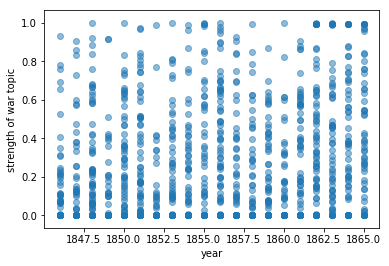

In [86]:
#plt.scatter([date.year for date in dates],theta[:,0],alpha=0.5);
plt.scatter([date.year for date in dates],theta_longrun[:,war_topic],alpha=0.5);
plt.ylabel('strength of war topic')
plt.xlabel('year');

In [1]:
#plt.scatter([date.year for date in dates],theta[:,0],alpha=0.5);
plt.scatter([date.year for date in dates],theta_longrun[:,war_topic],alpha=0.5);
plt.ylabel('strength of war topic')
plt.xlabel('year');

NameError: name 'plt' is not defined

**Your turn**: In my opinion, this visualization isn't great. Can you think of a graphical way to more clearly show the strength of this topic over time? You may want to transform the data before doing this.

Consider using [seaborn](https://seaborn.pydata.org/). To do this, you'll need to import pandas and make the data into a dataframe.